 # Project: Real Estate Analysis for BAY AREA

### Objective

The goal of this project is to examine several metrics to determine the factors influencing housing prices in the Bay Area. This was accomplished through web scraping of Redfin property listings, followed by data cleaning and exploratory data analysis. Our analysis comprised the following:


- San Francisco county  is the most expensive in term of price per SQFT
- Variables affecting Property Price:
  - Property Size (SQFT) – most significant
  - Garage availability – significantly
  - TransitScore - slightly
- Majorly, there are properties with 3 bedrooms or 2 bathrooms 
- Napa County has the highest number of such properties

### Data Dictionary:

- Zipcode: Zip Code of the property

- City: City of the property

- Garage Availability : Garage available with the property

- Transit Score : How well location is served by public transit

- List Price : Listed price/selling price/market value for the property

- Bedrooms : Number of rooms in the property

- Bathrooms : Number of baths in the property

- Walk Score : Based on walking distance from that address to various amenities

- Bike Score : Measures how bike friendly neighborhood is 

- School Rating : Rating of school for a particular city

- SQFT : Gives you the sqft of the property

- County : Gives us information about where is the property located


Import all the required libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [10]:
df = pd.read_csv('Data_clean.csv')  # Read the excel file
df

,Unnamed: 0,City,Zipcode,Price,Beds,Bath,SQFT,School_rating,WalkScore,Bike_Score,TransitScore,Garage_availability,County
0,0,Castro Valley,94552,1699000,3,2,2334.000000,5.6,0,5,23,Yes,Alameda County
1,1,PLEASANTON,94566,1249000,3,2,1614.000000,8.0,69,78,33,Yes,Alameda County
2,2,Oakland,94611,1288888,5,3,3631.000000,5.7,14,10,31,Yes,Alameda County
3,3,FREMONT,94539,2680000,4,3,2898.000000,8.3,13,33,36,Yes,Alameda County
4,4,HAYWARD,94544,458888,1,1,730.000000,5.6,70,34,61,Yes,Alameda County
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,1423,Sonoma,95476,525000,3,2,2089.017455,3.3,6,36,41,No,Sonoma County
1424,1424,Forestville,95436,579000,2,2,1193.000000,5.6,0,5,41,No,Sonoma County
1425,1425,Santa Rosa,95404,1725000,3,2,2285.000000,5.2,0,4,41,Yes,Sonoma County
1426,1426,Guerneville,95446,850000,5,2,2048.000000,5.6,17,9,41,No,Sonoma County


In [11]:
df.columns #define columns

Index(['Unnamed: 0', 'City', 'Zipcode', 'Price', 'Beds', 'Bath', 'SQFT',
       'School_rating', 'WalkScore', 'Bike_Score', 'TransitScore',
       'Garage_availability', 'County'],
      dtype='object')

In [12]:
df.drop(columns = ['Unnamed: 0'], axis =1, inplace = True)

In [13]:
df['City'] = df['City'].str.capitalize()

In [14]:
df.drop(df[df['Beds'] == 56].index, axis=0, inplace = True)

In [15]:
# Replace values greater than 100 with the mean
mean_bike_score = int(df['Bike_Score'].mean())
df['Bike_Score'] = np.where(df['Bike_Score'] > 100, mean_bike_score, df['Bike_Score'])

# Replace values greater than 100 with the mean
mean_walk_score = int(df['WalkScore'].mean())
df['WalkScore'] = np.where(df['WalkScore'] > 100, mean_walk_score, df['WalkScore'])

# Replace values greater than 100 with the mean
mean_transit_score = int(df['TransitScore'].mean())
df['TransitScore'] = np.where(df['TransitScore'] > 100, mean_walk_score, df['TransitScore'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427 entries, 0 to 1427
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 1427 non-null   object 
 1   Zipcode              1427 non-null   int64  
 2   Price                1427 non-null   int64  
 3   Beds                 1427 non-null   int64  
 4   Bath                 1427 non-null   int64  
 5   SQFT                 1427 non-null   float64
 6   School_rating        1427 non-null   float64
 7   WalkScore            1427 non-null   int64  
 8   Bike_Score           1427 non-null   int64  
 9   TransitScore         1427 non-null   int64  
 10  Garage_availability  1427 non-null   object 
 11  County               1427 non-null   object 
dtypes: float64(2), int64(7), object(3)
memory usage: 144.9+ KB


### Analyzing the data


The following are the business questions that we could analyze using the redfin data:

1.	What are the cities with the highest and lowest average price per square feet per county & outliners?
2.	Does the presence of a garage significantly affect property prices?
3.	Distribution of houses based on number of bedrooms and bathrooms?
4.  Does the walk, bike, and transit score have an effect on house prices?
5.	Disribution of Sales and SQFT based on counties
6.	How does the size of property effect on price?

## 1.What are the cities with the highest and lowest average price per square feet per county and outliners?

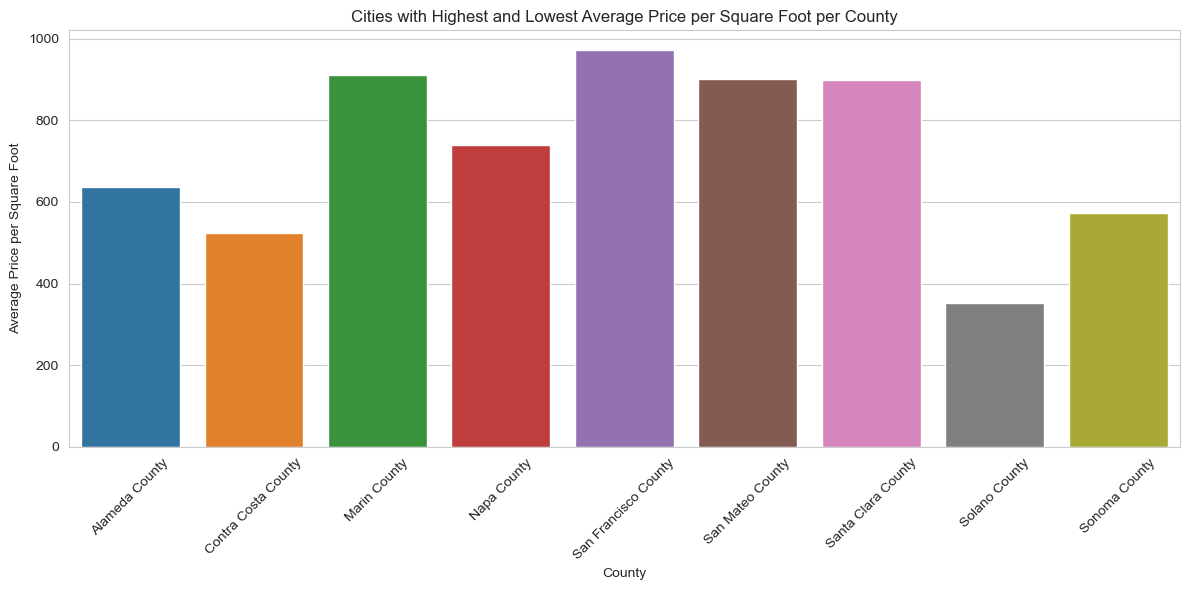

In [17]:
# Calculate the price per square foot
df['Price_Per_Sqft'] = df['Price'] / df['SQFT']

# Group the data by 'County'and calculate the average price per square foot
average_price_per_sqft = df.groupby(['County'])['Price_Per_Sqft'].mean().reset_index()

# Identify counties with the highest and lowest average price per square foot
highest_price_counties = average_price_per_sqft.loc[average_price_per_sqft.groupby('County')['Price_Per_Sqft'].idxmax()]
lowest_price_counties = average_price_per_sqft.loc[average_price_per_sqft.groupby('County')['Price_Per_Sqft'].idxmin()]

# Combine cities with the highest and lowest average price per square foot
filtered_data = pd.concat([highest_price_counties, lowest_price_counties])

# Create a bar graph to visualize the results
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x='County', y='Price_Per_Sqft', data=filtered_data, ax=ax)
ax.set_xlabel('County')
ax.set_ylabel('Average Price per Square Foot')
ax.set_title('Cities with Highest and Lowest Average Price per Square Foot per County')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


#### Observation

- San Francisco county has the highest per sqft price in the bay area which is followed closely by Santa Clara and San Mateo Counties.
- Solano county has the lowest per sqft price in the bay area which is less than half the price per sqft of Santa Clara or San-Mateo counties.
- Average Price per Sqft across all counties seem to be more than 600.


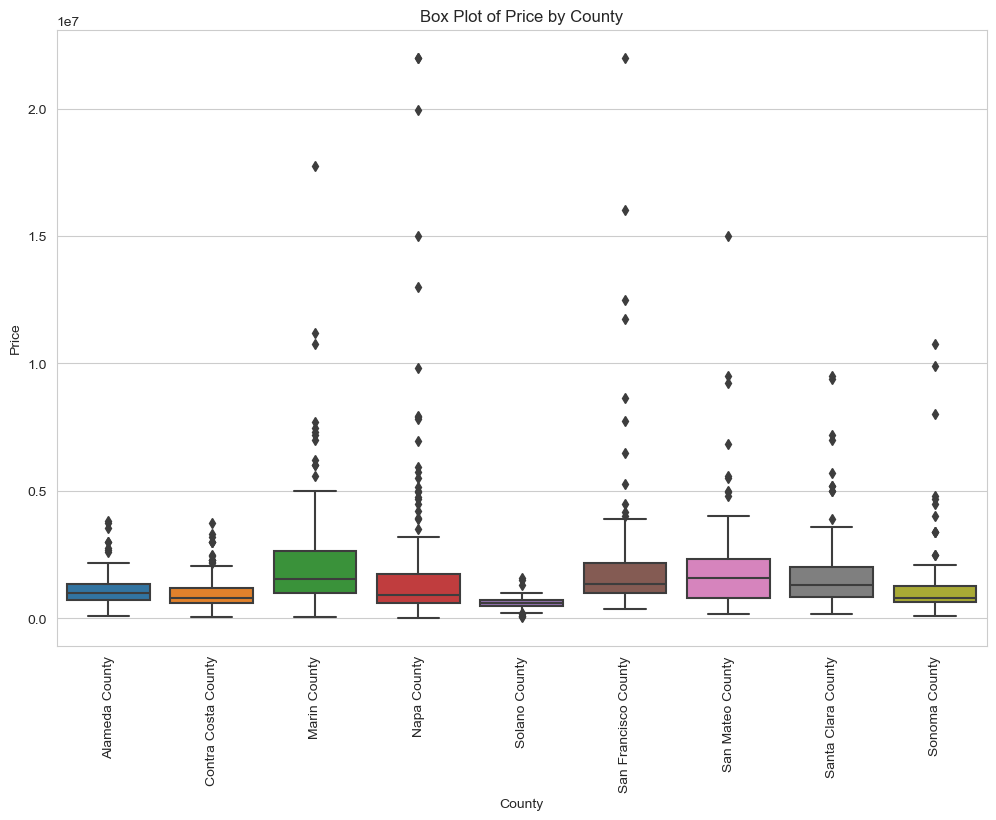

In [18]:
# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='County', y='Price', data=df)
plt.title('Box Plot of Price by County')
plt.xlabel('County')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

#### Observation

- The median line inside the box represents the median price within each county.
- The height of the box indicates the interquartile range (IQR).
- The longer the box, the greater the spread of prices.
 


## 2.Does the presence of a garage significantly affect property prices?

T-test statistic: 3.51
P-value: 0.000457
Mean price with garage: $1,627,809.97
Mean price without garage: $1,187,177.07
Price difference (with garage - without garage): $440,632.89


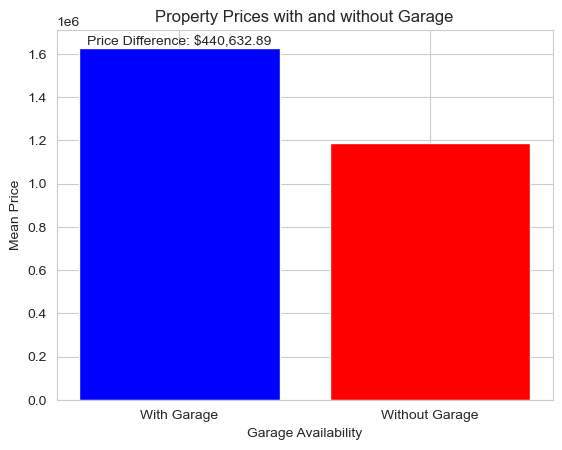

The presence of a garage significantly affects property prices.


In [19]:
# Separate properties with and without garages
with_garage = df[df['Garage_availability'] == 'Yes']
without_garage = df[df['Garage_availability'] == 'No']

# Perform a t-test to compare property prices
t_stat, p_value = stats.ttest_ind(with_garage['Price'], without_garage['Price'])

# Calculate the price difference
price_difference = np.mean(with_garage['Price']) - np.mean(without_garage['Price'])

print(f'T-test statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.6f}')
print(f'Mean price with garage: ${np.mean(with_garage["Price"]):,.2f}')
print(f'Mean price without garage: ${np.mean(without_garage["Price"]):,.2f}')
print(f'Price difference (with garage - without garage): ${price_difference:,.2f}')

# Create a bar chart to visualize the price difference
categories = ['With Garage', 'Without Garage']
mean_prices = [np.mean(with_garage['Price']), np.mean(without_garage['Price'])]

plt.bar(categories, mean_prices, color=['blue', 'red'])
plt.xlabel('Garage Availability')
plt.ylabel('Mean Price')
plt.title('Property Prices with and without Garage')
plt.text(0, max(mean_prices), f'Price Difference: ${price_difference:,.2f}', ha='center', va='bottom')
plt.show()

# Determine statistical significance
alpha = 0.05
if p_value < alpha:
    print('The presence of a garage significantly affects property prices.')
else:
    print('There is no significant difference in property prices based on garage availability.')


## 3.Distribution of houses based on number of bedrooms and bathrooms?

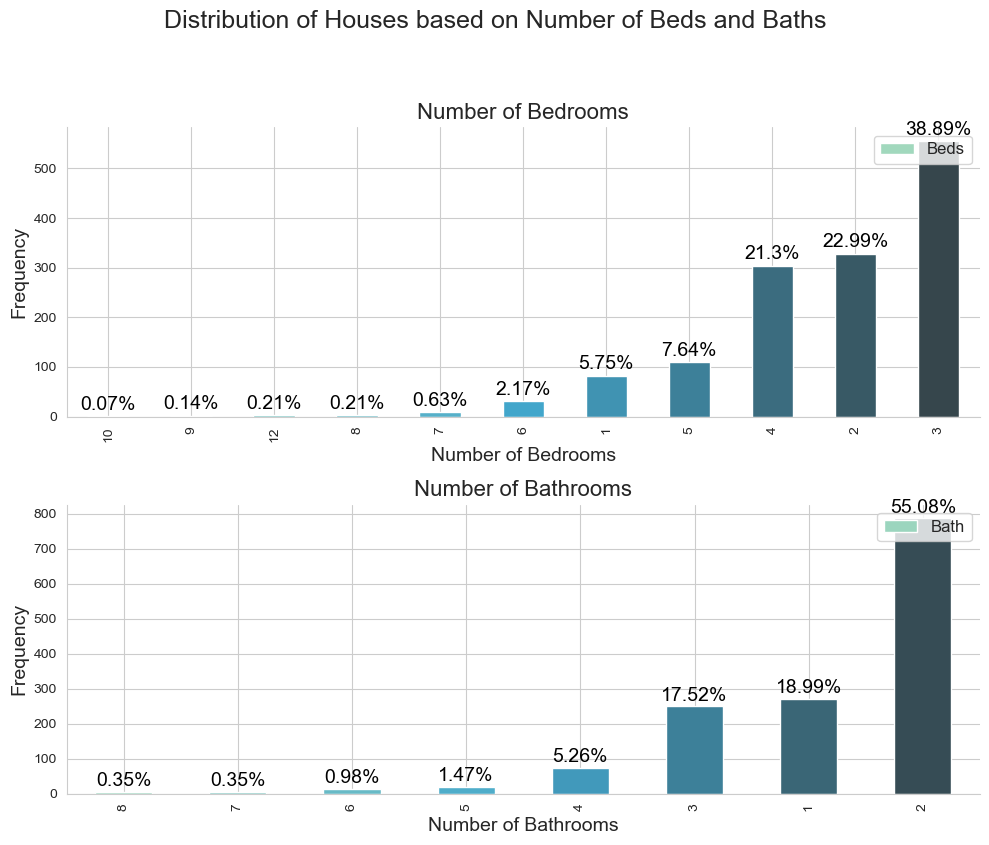

In [20]:
# Create a figure
fig = plt.figure(figsize=(10, 8))
fig.suptitle("Distribution of Houses based on Number of Beds and Baths", fontsize=18, y=1.05)

# Plot the number of bedrooms
ax1 = fig.add_subplot(2, 1, 1)
x = "Beds"
ax = df[x].value_counts().sort_values().plot(kind="bar", color=sns.color_palette("GnBu_d", len(df[x].unique())))
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5,
            str(round((i.get_height() / total) * 100, 2)) + '%',
            ha='center', va='bottom', fontsize=14, color='black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
ax1.set_title("Number of Bedrooms", fontsize=16)
ax1.set_xlabel("Number of Bedrooms", fontsize=14)
ax1.set_ylabel("Frequency", fontsize=14)
ax1.legend(loc='upper right', fontsize=12)

# Plot the number of bathrooms
ax2 = fig.add_subplot(2, 1, 2)
x = "Bath"
ax = df[x].value_counts().sort_values().plot(kind="bar", color=sns.color_palette("GnBu_d", len(df[x].unique())))
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 5,
            str(round((i.get_height() / total) * 100, 2)) + '%',
            ha='center', va='bottom', fontsize=14, color='black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
ax2.set_title("Number of Bathrooms", fontsize=16)
ax2.set_xlabel("Number of Bathrooms", fontsize=14)
ax2.set_ylabel("Frequency", fontsize=14)
ax2.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


#### Observation

- Houses with 3 bedrooms are the most common among the listings at over 38%. Additionally, houses with 2 baths are also highly frequent in our data with almost half of all listings.
- Least in numbers are apartments with 10 bedrooms and 8 or 7 baths.

In [21]:
#cross-tabulation
pd.crosstab(df['Beds'], df['Bath'])

Bath,1,2,3,4,5,6,7,8
Beds,,,,,,,,
1,78,4,0,0,0,0,0,0
2,118,206,3,1,0,0,0,0
3,70,417,63,5,0,0,0,0
4,5,139,132,22,5,1,0,0
5,0,16,48,34,7,4,0,0
6,0,2,4,10,7,6,2,0
7,0,0,0,2,1,2,2,2
8,0,0,0,1,0,0,1,1
9,0,0,0,0,1,0,0,1


- The most common combination for beds and baths in houses seem to be 3beds and 2 baths.

## 4.Does the walk, bike, and transit score have an effect on house prices?

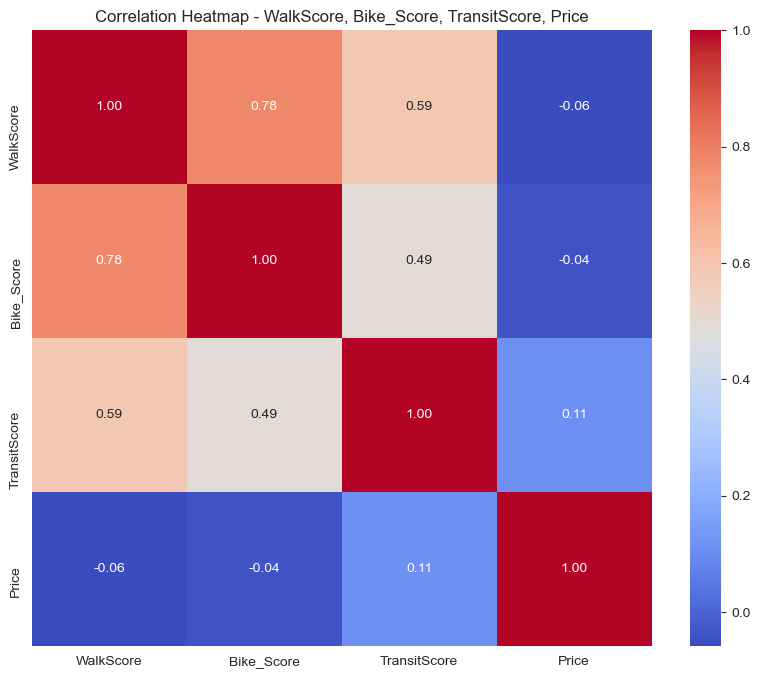

In [22]:
# Select the columns of interest
columns_of_interest = ['WalkScore', 'Bike_Score', 'TransitScore', 'Price']
df_selected = df[columns_of_interest]

# Create a heatmap
correlation_matrix = df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - WalkScore, Bike_Score, TransitScore, Price')
plt.show()

To analyze the effect of all the scores ('WalkScore,' 'Bike_Score,' 'TransitScore') on the 'Price' column, you can perform a multiple linear regression analysis. This analysis will help you determine how well the scores collectively predict the 'Price' column.

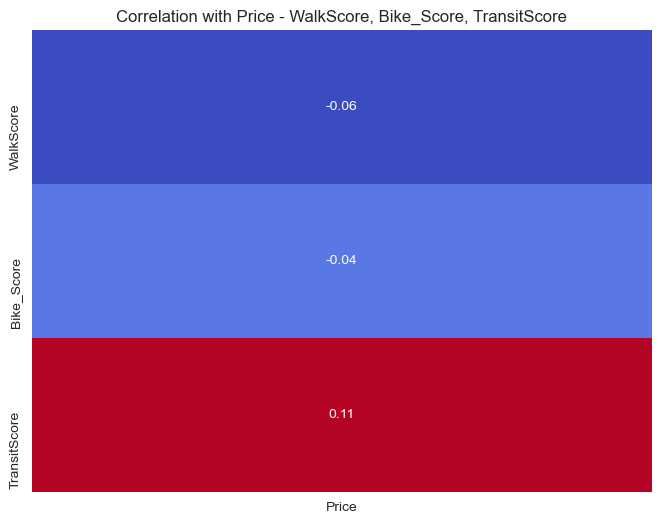

In [23]:
# Create a correlation matrix focusing on the selected columns
correlation_matrix = df_selected.corr()

# Extract the correlation values specifically for 'Price'
price_correlations = correlation_matrix['Price'][['WalkScore', 'Bike_Score', 'TransitScore']]

# Create a heatmap for the correlations with 'Price'
plt.figure(figsize=(8, 6))
sns.heatmap(price_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with Price - WalkScore, Bike_Score, TransitScore')
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Select the independent variables (scores) and add a constant term for the intercept
X = df[['WalkScore', 'Bike_Score', 'TransitScore']]
X = sm.add_constant(X)

# Dependent variable
y = df['Price']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


**Analysis of Multiple Regression Results**

1. **Model Fit**:
   - The multiple regression model was fitted to examine the relationship between the 'Price' of properties and three independent variables: 'WalkScore,' 'Bike_Score,' and 'TransitScore.'
   - The overall model is statistically significant, as indicated by the low p-value for the F-statistic (p < 0.001). This suggests that the model, as a whole, explains a significant portion of the variance in 'Price.'

2. **R-squared (R²)**:
   - The R-squared value is 0.032, indicating that only approximately 3.2% of the variability in 'Price' can be explained by the three independent variables. This suggests that 'WalkScore,' 'Bike_Score,' and 'TransitScore' have a limited ability to predict property prices in the dataset.


## 5.Disribution of Sales and SQFT based on counties

Shape before removing outliers: (1427, 13)
Shape after removing outliers: (1257, 13)


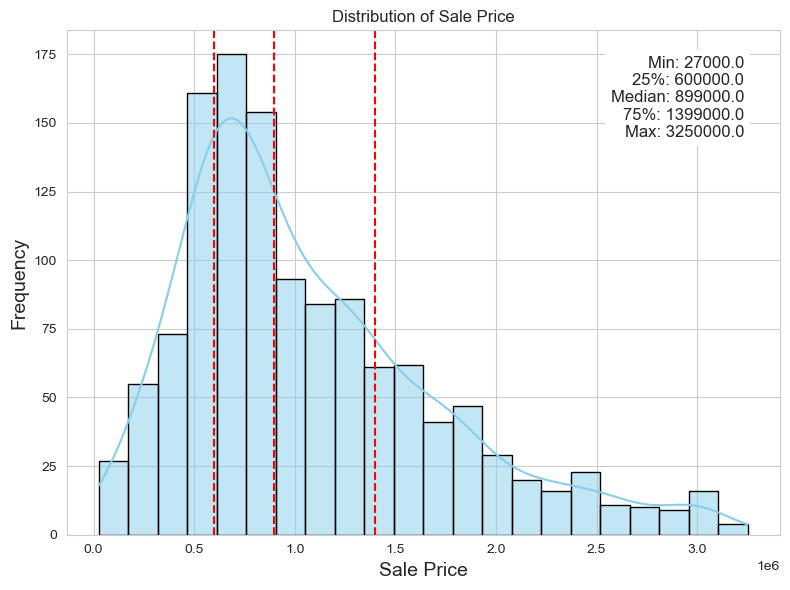

In [24]:
columns_to_check = ['Price', 'SQFT']

# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(data, columns):
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data

# Remove outliers
df_no_outliers = remove_outliers_iqr(df, columns_to_check)

# Print the shape before and after removing outliers
print('Shape before removing outliers:', df.shape)
print('Shape after removing outliers:', df_no_outliers.shape)

x = "Price"
fig, ax = plt.subplots(figsize=(8,6))
ax.title.set_text('Distribution of Sale Price')
variable = df_no_outliers[x].fillna(df_no_outliers[x].mean())
sns.histplot(variable, kde=True, color='skyblue', edgecolor='black')
des = df_no_outliers[x].describe()
ax.axvline(des["25%"], ls='--', color='r')
ax.axvline(des["50%"], ls='--', color='r')
ax.axvline(des["75%"], ls='--', color='r')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("Min: "+des["min"], "25%: "+des["25%"], "Median: "+des["50%"], "75%: "+des["75%"], "Max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=12, va='top',
ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax.set_xlabel('Sale Price', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

#### Observation:

- The distribution of sale prices appears to be right-skewed, with a longer tail on the right side. 
- The skewness suggests that while many properties have sale prices clustered around the median, a smaller number of properties have substantially higher sale prices.


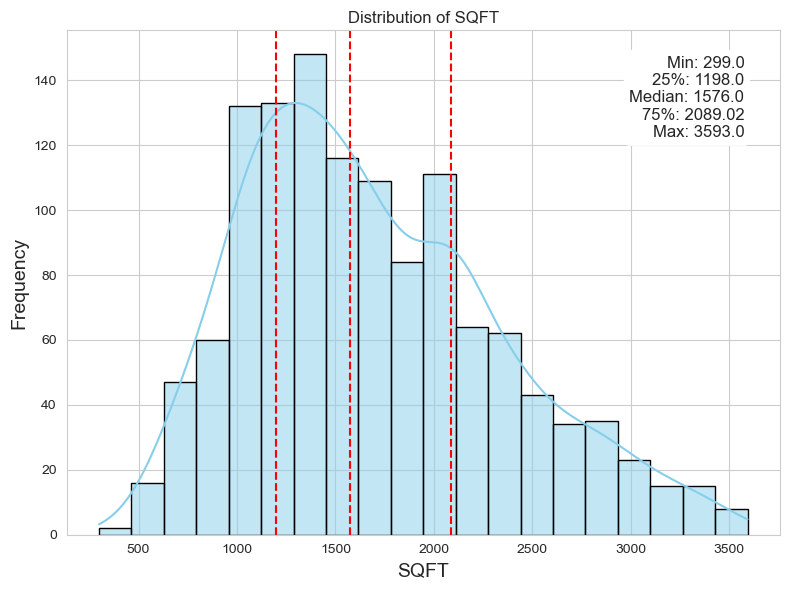

In [25]:
x = "SQFT"
fig, ax = plt.subplots(figsize=(8,6))
ax.title.set_text('Distribution of SQFT')
variable = df_no_outliers[x].fillna(df_no_outliers[x].mean())
sns.histplot(variable, kde=True, color='skyblue', edgecolor='black')
des = df_no_outliers[x].describe()
ax.axvline(des["25%"], ls='--', color='r')
ax.axvline(des["50%"], ls='--', color='r')
ax.axvline(des["75%"], ls='--', color='r')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("Min: "+des["min"], "25%: "+des["25%"], "Median: "+des["50%"], "75%: "+des["75%"], "Max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=12, va='top',
ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax.set_xlabel('SQFT', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

#### Observation:

- The distribution of SQFT appears to be unimodal and somewhat symmetric, with a peak near the median. 
- The skewness suggests that many properties have SQFT values clustered around the central value, resulting in a bell-shaped distribution.


## 6.How does the size of property effect on price?

R-squared value: 0.29


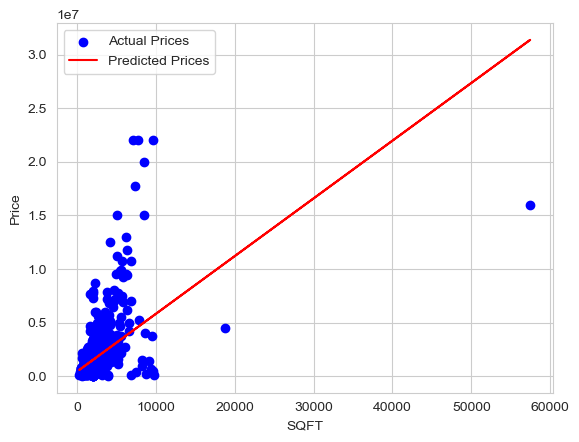

In [26]:
# Extract the 'SQFT' and 'Price' columns
X = df['SQFT'].values.reshape(-1, 1)
y = df['Price']

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the R-squared value to assess the goodness of fit
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(f'R-squared value: {r2:.2f}')

# Visualize the relationship between 'SQFT' and 'Price' using a scatter plot and the regression line
plt.scatter(X, y, color='b', label='Actual Prices')
plt.plot(X, y_pred, color='r', label='Predicted Prices')
plt.xlabel('SQFT')
plt.ylabel('Price')
plt.legend()
plt.show()

In [27]:
correlation = df['SQFT'].corr(df['Price'])
correlation

0.5413827290909865

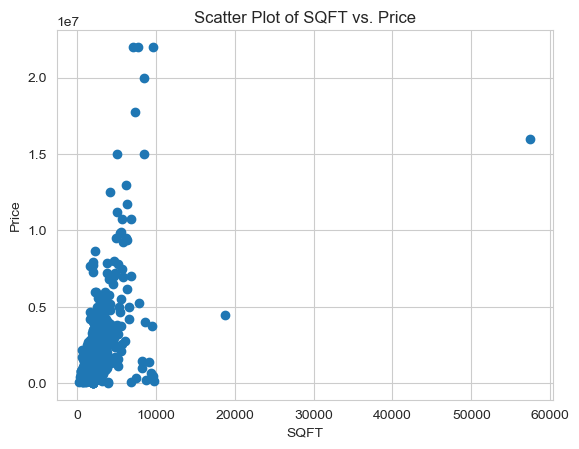

In [28]:
plt.scatter(df['SQFT'], df['Price'])
plt.xlabel('SQFT')
plt.ylabel('Price')
plt.title('Scatter Plot of SQFT vs. Price')
plt.show()

# Hypothesis Testing

In [29]:
# Split the data into two groups based on 'SQFT'
small_sqft = df[df['SQFT'] < 2000]['Price']
large_sqft = df[df['SQFT'] >= 2000]['Price']

# Perform a t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(small_sqft, large_sqft)

# Make a Decision
alpha = 0.05

# Draw a Conclusion
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant difference in property prices based on 'SQFT'.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in property prices based on 'SQFT'.")


Reject the null hypothesis. There is a significant difference in property prices based on 'SQFT'.


- A hypothesis test is to determine if there's a statistically significant relationship between 'SQFT' and 'Price'. 

- A low p-value (< 0.05) suggests that there is a statistically significant difference in prices for different property sizes.

- These methods provide different perspectives on the relationship between property size ('SQFT') and price, allowing you to draw conclusions based on your specific dataset and analysis goals.


- Null Hypothesis (H0): There is no significant difference in property prices based on 'SQFT.'
- Alternative Hypothesis (Ha or H1): There is a significant difference in property prices based on 'SQFT.'

Price            0
SQFT             0
Beds             0
Bath             0
School_rating    0
dtype: int64


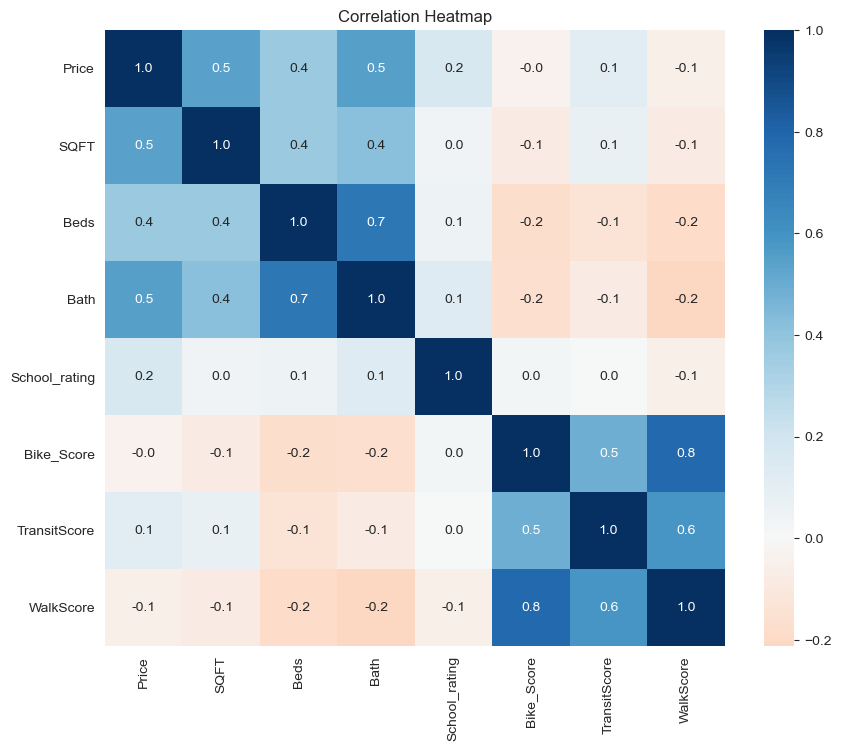

In [30]:
# Check for any missing values in the relevant columns
print(df[['Price', 'SQFT', 'Beds', 'Bath', 'School_rating']].isnull().sum())

# Clean the data (remove rows with missing values)
df = df.dropna(subset=['Price', 'SQFT', 'Beds', 'Bath', 'School_rating'])

# Calculate Pearson correlation coefficients
correlation_matrix = df[['Price', 'SQFT', 'Beds', 'Bath', 'School_rating', 'Bike_Score', 'TransitScore', 'WalkScore']].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='RdBu', center=0)
plt.title('Correlation Heatmap')
plt.show()